                                 Universidad Juárez Autónoma de Tabasco
                                 División Académica de Ciencias Básicas
                                            Examen 1er parcial
                             Materia: Temas Selectos de Modelación Geofísica
                                    Nombre: Jair Alfredo Cueto Angulo
                                            Matrícula: 132A19083
                                   Carrera: Ingeniería Geofísica
                                    Correo: jaiircuetoo@hotmail.com

In [1]:
versioninfo()

Julia Version 0.6.0
Commit 9036443 (2017-06-19 13:05 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Celeron(R) CPU  N2840  @ 2.16GHz
  WORD_SIZE: 64
  BLAS: libopenblas (USE64BITINT DYNAMIC_ARCH NO_AFFINITY Atom)
  LAPACK: libopenblas64_
  LIBM: libopenlibm
  LLVM: libLLVM-3.9.1 (ORCJIT, silvermont)


In [5]:
#El DataFrames es una estructura de datos como una tabla o hoja de cálculo.

using DataFrames
using PyPlot

In [6]:
data = readtable("data.csv");

In [9]:
#Nota: este ejemplo es para un polinomio de grado 5 si quiere realizar el ejercicio con un polinomio menor simplemente,
#agregar un # a los valores de x^n que no ocupe. Por ejemplo para un polinomio de grado 2 se deberá poner como comentario
#los valores de x3, x4 y x5·
#Si desea realizar el ejercicio para un polinomio de grado >5, simplemente agregar cuantos valores necesarios de x^n
#por ejemplo para x^7, agregar x6 = x.^6 y x7.^7

N = ones(117,1) # Vector de unos con ciento diecisiete elementos
x = data[1];    # Valores de x
x2 = x.^2;      # Valores de x^2
x3 = x.^3;      # Valores de x^3
x4 = x.^4;      # Valores de x^4
x5 = x.^5;      # Valores de x^5
y = data[2];    # Valores de y

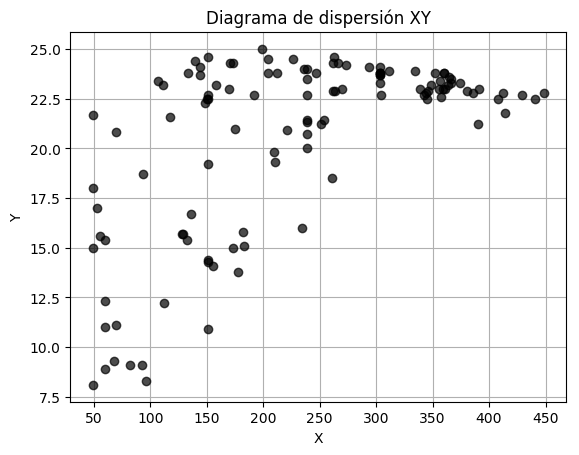

In [10]:
plot(x,y, "o", color="black", linewidth=0.1, alpha=0.7)
title("Diagrama de dispersión XY")
xlabel("X")
ylabel("Y")
grid("on")

In [11]:
# m = [[Gt*G]^-1]*[Gt*d]

In [12]:
G = [N x x2 x3 x4 x5] # Vector G con valores 1, x y cuanto x^n sea asignado al principio.

117×6 Array{Float64,2}:
 1.0   96.14   9242.9        8.88612e5  8.54312e7   8.21335e9 
 1.0   69.51   4831.64       3.35847e5  2.33447e7   1.62269e9 
 1.0   69.32   4805.26       3.33101e5  2.30905e7   1.60064e9 
 1.0  448.38      2.01045e5  9.01444e7  4.04189e10  1.8123e13 
 1.0  385.4       1.48533e5  5.72447e7  2.20621e10  8.50273e12
 1.0  357.49      1.27799e5  4.56869e7  1.63326e10  5.83874e12
 1.0  341.89      1.16889e5  3.99631e7  1.3663e10   4.67124e12
 1.0  345.57      1.19419e5  4.12675e7  1.42608e10  4.92811e12
 1.0  343.68      1.18116e5  4.05941e7  1.39514e10  4.79481e12
 1.0  339.21      1.15063e5  3.90307e7  1.32396e10  4.491e12  
 1.0  112.43  12640.5        1.42117e6  1.59782e8   1.79643e10
 1.0  117.2   13735.8        1.60984e6  1.88673e8   2.21125e10
 1.0  128.22  16440.4        2.10798e6  2.70286e8   3.4656e10 
 ⋮                                                  ⋮         
 1.0  133.49  17819.6        2.37874e6  3.17537e8   4.23881e10
 1.0  170.74  29152.1        4.

In [13]:
Gt = transpose(G)    #Vector G transpuesta

6×117 Array{Float64,2}:
    1.0           1.0           1.0        …      1.0             1.0       
   96.14         69.51         69.32            246.23          204.41      
 9242.9        4831.64       4805.26          60629.2         41783.4       
    8.88612e5     3.35847e5     3.33101e5         1.49287e7       8.54095e6 
    8.54312e7     2.33447e7     2.30905e7         3.6759e9        1.74586e9 
    8.21335e9     1.62269e9     1.60064e9  …      9.05117e11      3.56871e11

In [14]:
A = (Gt * G)         # A = G transpuesta * G

6×6 Array{Float64,2}:
   117.0         26838.4         …  2.38197e9   8.05154e11  2.84887e14
 26838.4             7.55153e6      8.05154e11  2.84887e14  1.04131e17
     7.55153e6       2.38197e9      2.84887e14  1.04131e17  3.90083e19
     2.38197e9       8.05154e11     1.04131e17  3.90083e19  1.49012e22
     8.05154e11      2.84887e14     3.90083e19  1.49012e22  5.78509e24
     2.84887e14      1.04131e17  …  1.49012e22  5.78509e24  2.27716e27

In [15]:
Ainv = inv(A)      # Ainv = inversa del vector A

6×6 Array{Float64,2}:
  7.70503      -0.241074      0.00253911   …   2.50987e-8   -1.98171e-11
 -0.241074      0.00772829   -8.26976e-5      -8.33461e-10   6.62245e-13
  0.00253911   -8.26976e-5    8.96867e-7       9.21599e-12  -7.37387e-15
 -1.18252e-5    3.89461e-7   -4.26953e-9      -4.46391e-14   3.59549e-17
  2.50987e-8   -8.33461e-10   9.21599e-12      9.77993e-17  -7.92491e-20
 -1.98171e-11   6.62245e-13  -7.37387e-15  …  -7.92491e-20   6.45634e-23

In [16]:
d = y

117-element DataArrays.DataArray{Float64,1}:
  8.3
 20.8
 11.1
 22.8
 22.8
 22.6
 22.7
 22.9
 22.8
 23.0
 12.2
 21.6
 15.7
  ⋮  
 23.8
 24.3
 24.3
 24.4
 18.7
 24.1
 24.6
 14.3
 10.9
 22.5
 23.8
 23.8

In [17]:
betha = Gt * d           #betha = G transpuesta por d

6-element DataArrays.DataArray{Float64,1}:
 2407.41      
    5.87094e5 
    1.69712e8 
    5.41446e10
    1.8386e13 
    6.51506e15

In [18]:
m = Ainv * betha         #los coeficientes de m = Ainv*betha

6-element DataArrays.DataArray{Float64,1}:
 18.3019    
 -0.196525  
  0.00282224
 -1.35476e-5
  2.81614e-8
 -2.1679e-11

In [31]:
#Asigno cada valor de los coeficiente de correlación a las variables m1, m2, m3 hasta m^n
m1 = m[1]
m2 = m[2]
m3 = m[3]
m4 = m[4]
m5 = m[5]
m6 = m[6]

#Generé una función k(xx) con los valores de los coeficientes que tomé y asignando a xx la sucesió de números
#de 49 (min) hasta 448 (max) en 1 en 1.
xx = collect(49:1:448);xx = collect(50:1:450);
k(xx) = m1 + m2.*xx + m3.*xx.^2 + m4.*xx.^3 + m5.*xx.^4 + m6.*xx.^5

k (generic function with 1 method)

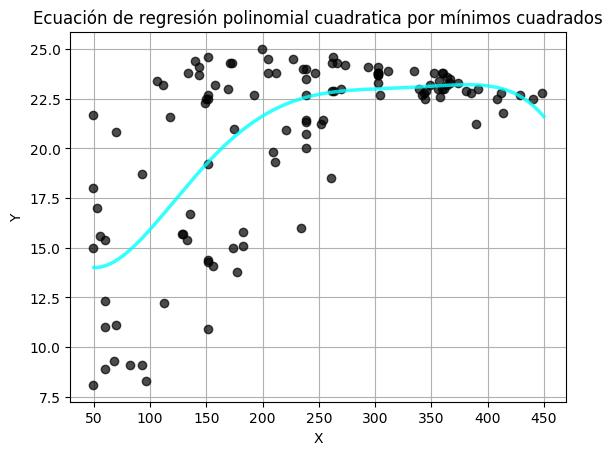

In [32]:
plot(x,y, "o", color="black", linewidth=3, alpha=0.7)
plot(xx,k(xx), color="cyan", linewidth=2.5, alpha=0.8)
title("Ecuación de regresión polinomial cuadratica por mínimos cuadrados")
xlabel("X")
ylabel("Y")
grid("on")

In [33]:
prediccion = k(x)    # Y' = k(x) = la predicción

117-element DataArrays.DataArray{Float64,1}:
 15.683 
 14.3498
 14.3433
 21.7062
 23.1994
 23.1501
 23.0979
 23.11  
 23.1038
 23.0893
 16.738 
 17.0595
 17.8044
  ⋮     
 18.1562
 20.3766
 20.4814
 18.572 
 15.4969
 18.814 
 19.2718
 19.2718
 19.2718
 19.2718
 22.6701
 21.7731

In [34]:
# Error (e) o misfit = Y - Y'
error = (y - k(x))

117-element DataArrays.DataArray{Float64,1}:
 -7.38296  
  6.45015  
 -3.24327  
  1.09378  
 -0.399395 
 -0.550051 
 -0.397905 
 -0.210046 
 -0.303771 
 -0.0892897
 -4.53798  
  4.54047  
 -2.1044   
  ⋮        
  5.64379  
  3.92339  
  3.81857  
  5.82801  
  3.20306  
  5.28603  
  5.32824  
 -4.97176  
 -8.37176  
  3.22824  
  1.12986  
  2.02689  

In [35]:
# La suma de los errores:
sum(error)

7.82035769475442e-9

In [36]:
# Error cuadratico (e)²
error2 = error.^2

117-element DataArrays.DataArray{Float64,1}:
 54.5081    
 41.6044    
 10.5188    
  1.19636   
  0.159517  
  0.302556  
  0.158328  
  0.0441192 
  0.0922769 
  0.00797265
 20.5932    
 20.6159    
  4.42852   
  ⋮         
 31.8524    
 15.393     
 14.5815    
 33.9657    
 10.2596    
 27.9421    
 28.3902    
 24.7184    
 70.0863    
 10.4215    
  1.27659   
  4.10828   

In [37]:
# suma de los cuadrados de los errores de predicción o residuales (SCE)
SCE = sum(error2)

1214.5625510670561

media aritmetica del cuadrado de los errores de predicción, resultado de dividir SCE entre n, el cual se denomina como: varianza de los errores (σxy²)

In [38]:
n = length(x);          # n es el tamaño de mi vector
σxy2 = SCE/n    # Varianza de errores cuadraticos

10.380876504846633

In [39]:
# Igualdad de la descomposición de la varianza
yprom = sum(y)/length(y)   # y promedio
σypre2 = sum((prediccion-yprom).^2) / length(y)  #varianza de los valores predichos al cuadrado

9.595690752893267

In [40]:
σy2 = σypre2 + σxy2         #La varianza de la variable y es igua a a la varianza de los valores predichos al cuadrado + la varianza de los errores al cuadrado

19.9765672577399

In [41]:
R2 = (σypre2/σy2)    # Coeficiente de determinación (R²)

0.4803473304040976

In [42]:
# coeficiente de correlación de Pearson entre las dos variables como r = sqrt(R²)
r = sqrt(R2)

0.6930709418263744